In [42]:
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
plt.style.use('bmh')

import seaborn as sns
sns.set_theme()
sns.set_context('paper')

In [43]:
qsos = pd.read_csv('qso_full_sample.csv', header=1)
qsos

,specobjid,ra,dec,plate,mjd,fiberID,subclass,z,oiii_5007_flux,oiii_5007_flux_err,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,nii_6584_flux,nii_6584_flux_err
0,455999113465456640,34.921390,-0.255664,405,51816,35,STARBURST,0.025753,595.33300,15.117890,9309.23300,75.693420,2186.90100,25.256650,4085.68400,33.673570
1,456155244116600832,34.269918,1.244198,405,51816,603,BROADLINE,0.021411,365.26670,16.856830,517.07650,25.369940,133.62850,14.755470,865.12180,25.333100
2,968317389500344320,121.104020,29.506663,860,52319,158,NaN,0.017657,93.51083,9.730795,148.17510,11.853940,74.23348,8.233102,67.37181,11.574770
3,968330858517784576,120.167320,28.476501,860,52319,207,BROADLINE,0.048595,56.41619,4.560118,117.25350,6.299795,37.83551,4.459010,178.82970,6.219587
4,972926267382851584,130.607360,37.221036,864,52320,541,AGN BROADLINE,0.012850,299.76710,14.780540,898.61180,23.301670,212.81670,11.909110,1274.40400,26.445670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,2928594919838738432,192.063460,17.774016,2601,54144,470,BROADLINE,0.020578,89.25125,7.093899,47.67188,4.332805,22.78214,3.475621,42.46384,5.756762
970,2933035853007579136,199.984780,15.850533,2605,54484,242,NaN,0.023236,108.04440,10.694520,113.15190,13.524380,77.45830,10.454970,120.36340,13.802930
971,3343996467592325120,245.077620,18.464620,2970,54589,268,BROADLINE,0.034936,80.73515,6.528084,144.34450,9.226276,39.16608,5.987207,141.39190,8.549505
972,3344069859993479168,246.114360,19.482573,2970,54589,535,STARFORMING BROADLINE,0.034969,61.79113,6.547112,530.87510,11.500790,85.17157,6.343073,311.07010,10.228310


In [44]:
qsos.shape

(974, 16)

In [45]:
qsos.columns

Index(['specobjid', 'ra', 'dec', 'plate', 'mjd', 'fiberID', 'subclass', 'z',
       'oiii_5007_flux', 'oiii_5007_flux_err', 'h_alpha_flux',
       'h_alpha_flux_err', 'h_beta_flux', 'h_beta_flux_err', 'nii_6584_flux',
       'nii_6584_flux_err'],
      dtype='object')

In [46]:
Counter(qsos['subclass'])

Counter({'STARBURST': 163,
         'BROADLINE': 319,
         nan: 93,
         'AGN BROADLINE': 71,
         'STARFORMING BROADLINE': 29,
         'STARFORMING': 214,
         'AGN': 84,
         'STARBURST BROADLINE': 1})

Here, I'll plot the distribution of the fluxes to get an idea of the data.

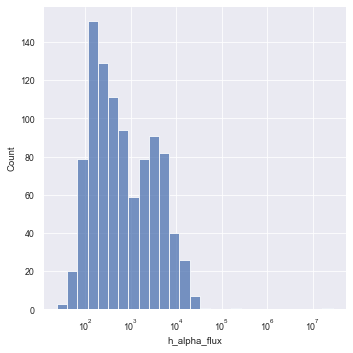

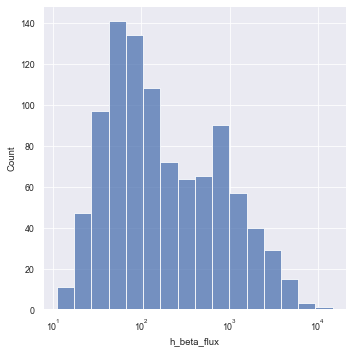

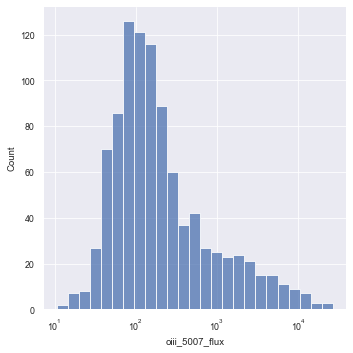

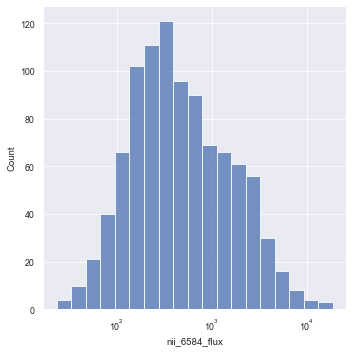

In [41]:
cols = ['h_alpha_flux', 'h_beta_flux', 'oiii_5007_flux', 'nii_6584_flux']

for col in cols:
    sns.displot(data=qsos, x=col, log_scale=True)

    # plt.savefig('distr_' + col + '.pdf')

    plt.show()

# BPT Diagram

In [6]:
qsos['nii_h_alpha'] = qsos.apply(lambda x: x['nii_6584_flux'] / x['h_alpha_flux'], axis=1)
qsos['oiii_h_beta'] = qsos.apply(lambda x: x['oiii_5007_flux'] / x['h_beta_flux'], axis=1)

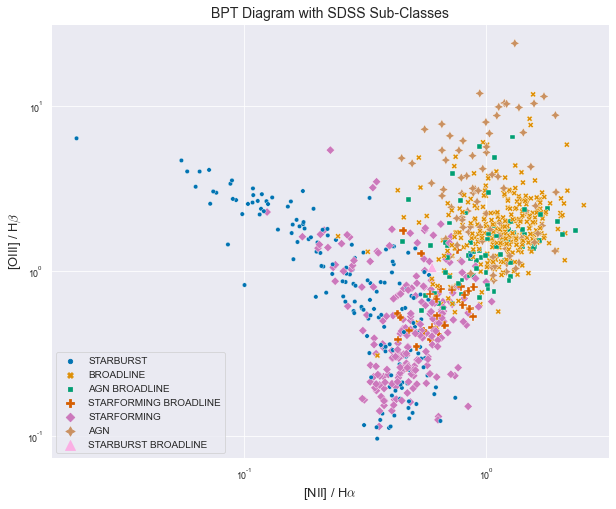

In [8]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=qsos, x='nii_h_alpha', y='oiii_h_beta', palette='colorblind', 
                hue='subclass', style='subclass', size='subclass', sizes=(100, 20))

plt.title('BPT Diagram with SDSS Sub-Classes', fontsize=14)
plt.xlabel(r'[NII] / H$\alpha$', fontsize=13)
plt.ylabel(r'[OIII] / H$\beta$', fontsize=13)

plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left', fontsize=10)

# plt.savefig('BPT_diagram_sdss_subclasses.pdf')

plt.show()

## BPT Diagram with Theoretical Lines

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


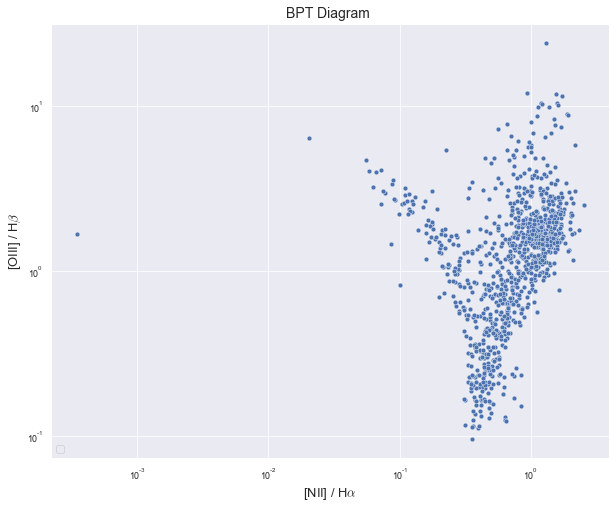

In [30]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=qsos, x='nii_h_alpha', y='oiii_h_beta', palette='colorblind'
                #hue='subclass', style='subclass', size='subclass', sizes=(100, 20)
                )

plt.title('BPT Diagram ', fontsize=14)
plt.xlabel(r'[NII] / H$\alpha$', fontsize=13)
plt.ylabel(r'[OIII] / H$\beta$', fontsize=13)

plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left', fontsize=10)

# plt.savefig('BPT_.pdf')

plt.show()

# Mid-IR WISE Colours

## Text File for Cross Match with WISE